### Lab Tasks
- In the dataframe creates in Lab 2 - Part b, set ``mpg`` as the target value. 
- The rest of the columns are considered as X, feature set. 
- Use ``train_test_split`` to split the dataset into train and test dataset. set ``random_state = 0``.
- Use ``StandardScaler`` to scale feature set X. 

### Lab Questions
1. Train ``LinearRegression`` model on this dataset. What is the intercept of this model? (enter the value with 2 significant digits). 
2. Train ``Ridge`` on this dataset. Which value of $\alpha$ gives the best fit? (set ``random_state = 0``)
$$\alpha \in \{0.01, 0.1, 1, 10\}$$
3. Train ``Lasso`` on this dataset. Which value of $\alpha$ gives the best fit? (set ``random_state = 0``)
$$\alpha \in \{0.01, 0.1, 1, 10\}$$
4. In order to visualize ``KNeighborsRegressor``, we have used matplotlib to plot the regressor for ``n_neighbors`` in [1, 5, 10, 20]. Train the model only on one column ``horsepower`` in X_train. Which of the following is the plot for ``n_neighbors = 5``.
5. Train ``KNeighborsRegressor`` on ``X_train`` and ``y_train`` with ``n_neighbors = 5``. What can we say about this regressor? 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import os

In [2]:
df1 = pd.read_csv("auto.csv")

In [3]:
pd.set_option('display.max_rows', df1.shape[0]+1)
df1.head(200)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


In [4]:
df1.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [5]:
df1.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000,397.000000
mean,23.528463,5.448363,193.139798,2969.080605,15.577078,76.025189,1.574307
std,7.820926,1.698329,104.244898,847.485218,2.755326,3.689922,0.802549
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.000000,2223.000000,13.900000,73.000000,1.000000
50%,23.000000,4.000000,146.000000,2800.000000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3609.000000,17.200000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [6]:
df1.replace({'?':None}, inplace = True)

In [7]:
df1.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [8]:
df1['horsepower'] = df1['horsepower'].fillna((df1['horsepower'].median()))

In [9]:
pd.set_option('display.max_rows', df1.shape[0]+1)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
5,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
6,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
7,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
8,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl
9,15.0,8,383.0,170,3563,10.0,70,1,dodge challenger se


In [10]:
df1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [11]:
df1['horsepower'] = df1['horsepower'].astype('float')

In [12]:
df1.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [13]:
df1.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
1,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
2,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
3,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
4,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500


In [14]:
y= df1['mpg']

X= df1[['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin']]

In [15]:
y[:5]

0    15.0
1    18.0
2    16.0
3    17.0
4    15.0
Name: mpg, dtype: float64

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

In [17]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))

0.8227969977096519
0.8073893880837442


In [18]:
print(lreg.intercept_)

23.55824915824916


In [19]:
print(lreg.coef_)

[-0.82545537  2.73890308 -0.58032533 -6.16168587  0.61826514  2.67807554
  1.23521039]


In [20]:
from  sklearn.linear_model import Ridge

x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    ridge = Ridge(alpha)
    ridge.fit(X_train,y_train)
    train_score_list.append(ridge.score(X_train,y_train))
    test_score_list.append(ridge.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

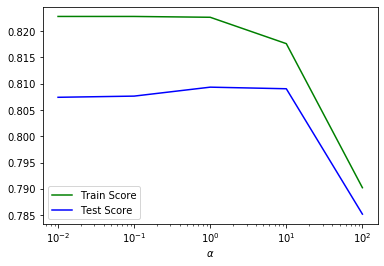

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

In [22]:
print(train_score_list)
print(test_score_list)

[0.8227969785612694, 0.8227951173696131, 0.8226385654128832, 0.8176198660362698, 0.7902151233240818]
[0.8074150184187624, 0.8076392673175277, 0.8093425412819516, 0.809039636094283, 0.7851880518833163]


In [23]:
X_std = scaler.fit_transform(X)

In [24]:
regr_cv = RidgeCV(alphas=[0.01, 0.1, 1, 10, 100])

In [25]:
model_cv = regr_cv.fit(X_std, y)

In [26]:
model_cv.alpha_

1.0

In [27]:
from sklearn.linear_model import Lasso
x_range = [0.01, 0.1, 1, 10, 100]
train_score_list = []
test_score_list = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list.append(lasso.score(X_train,y_train))
    test_score_list.append(lasso.score(X_test, y_test))

Text(0.5, 0, '$\\alpha$')

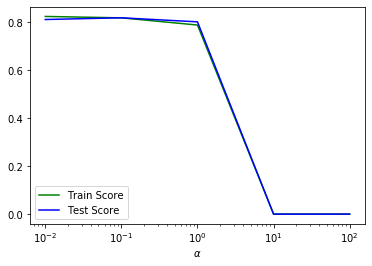

In [28]:
plt.plot(x_range, train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')

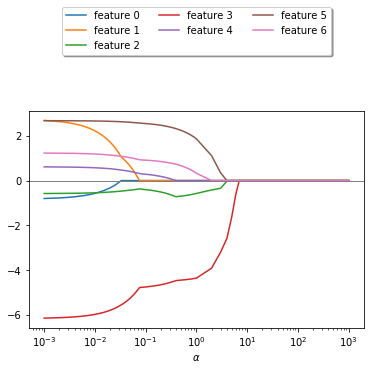

In [29]:
%matplotlib inline

x_range1 = np.linspace(0.001, 1, 1000).reshape(-1,1)
x_range2 = np.linspace(1, 1000, 1000).reshape(-1,1)

x_range = np.append(x_range1, x_range2)
coeff = []

for alpha in x_range: 
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    coeff.append(lasso.coef_ )
    
coeff = np.array(coeff)

for i in range(0,7):
    plt.plot(x_range, coeff[:,i], label = 'feature {:d}'.format(i))

plt.axhline(y=0, xmin=0.001, xmax=9999, linewidth=1, c ='gray')
plt.xlabel(r'$\alpha$')
plt.xscale('log')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.5),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [30]:
X_std = scaler.fit_transform(X)

In [31]:
lasso_cv = LassoCV(alphas=[0.01,0.1,1,10])

In [32]:
lasso_cv = lasso_cv.fit(X_std, y)

In [33]:
lasso_cv.alpha_

0.01

In [34]:
print(train_score_list)
print(test_score_list)

[0.8226213826515234, 0.8167791103918072, 0.7868797205409124, 0.0, 0.0]
[0.8098061159551057, 0.8169910445425022, 0.8001578511104844, -0.0002488620793819063, -0.0002488620793819063]


In [35]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

Text(0, 0.5, 'MSE')

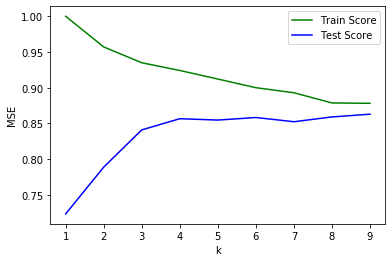

In [36]:
%matplotlib inline
train_score_array = []
test_score_array = []

for k in range(1,10):
    knn_reg = KNeighborsRegressor(k)
    knn_reg.fit(X_train, y_train)
    train_score_array.append(knn_reg.score(X_train, y_train))
    test_score_array.append(knn_reg.score(X_test, y_test))

x_axis = range(1,10)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('k')
plt.ylabel('MSE')

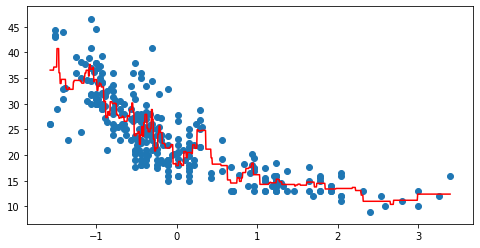

In [37]:
X_b = X_train[:,2].reshape(-1,1)
y_b = y_train[:]

knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_b, y_b)

X_new=np.linspace(X_b.min(), X_b.max(), 1000).reshape(1000, 1)
y_predict = knn_reg.predict(X_new)

plt.figure(figsize=(8,4))
plt.plot(X_new, y_predict, c = 'r')
plt.scatter(X_b, y_b)

In [38]:
%matplotlib inline


knn_reg = KNeighborsRegressor(5)
knn_reg.fit(X_train, y_train)
train_score = print(knn_reg.score(X_train, y_train))
test_score = print(knn_reg.score(X_test, y_test))

0.9121283905011592
0.8547621522339608
